<a href="https://colab.research.google.com/github/Harmanpreet6351/IrisClassification/blob/master/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Creatring DataSet
Loading Dataset from sklearn library

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

In [5]:
colNames = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
df = pd.DataFrame(data=data.data, columns=colNames)

In [6]:
@np.vectorize
def getSpecies(x):
  return data.target_names[x]

df['species'] = getSpecies(data.target)

### Analyzing data
we will directly start with data analysis as there are no null values in given dataset, sklearn's iris dataset is already clean

In [8]:
# Dataset Summary
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.001, 'Graph 1')

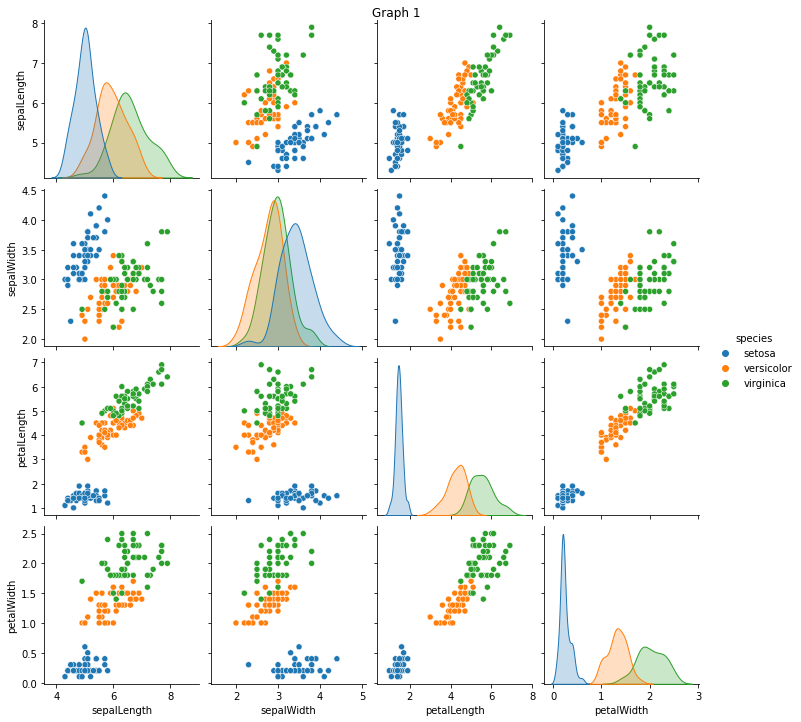

In [19]:
# Let us visualize the data

g = sns.pairplot(data=df, hue='species')
g.fig.suptitle("Graph 1", y=1.001)

In [20]:
# getting correlation

df.corr()

,sepalLength,sepalWidth,petalLength,petalWidth
sepalLength,1.000000,-0.117570,0.871754,0.817941
sepalWidth,-0.117570,1.000000,-0.428440,-0.366126
petalLength,0.871754,-0.428440,1.000000,0.962865
petalWidth,0.817941,-0.366126,0.962865,1.000000


### Training Model

In [21]:
X = df[colNames]
y = df.species

Training using RandomForest.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model1 = RandomForestClassifier()
cross_val_score(model1, X, y).mean()

0.9666666666666668

Training using RandomForest with different Estimators.

In [24]:
model2 = RandomForestClassifier(n_estimators=20)
cross_val_score(model2, X, y).mean()

0.96

Training using SVM.



In [25]:
from sklearn.svm import SVC
model3 = SVC()
cross_val_score(model3, X, y).mean()

0.9666666666666666

Training using SVM but with Petal Length and Petal Width only.

In [31]:
model4 = SVC()
cross_val_score(model4, X[colNames[2:]], y).mean()

0.96

We are still getting same accuracy even by removing sepal length and sepal width. why?<br>
It can be seen from above analysis that the correlation between Petal Length and Petal Width was higher than others and **therefore, it can be concluded that only Petal Length and Petal Width are important features to be collected for predicting Iris Species**

# Thank you